In [1]:
import party_information
import font_management
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(party_information.party_results_nc).T
df = df[df['group'] != 'unrelevant']
df = df[df['name'] != 'Christlichsoziale Partei']
df = df[df['name'] != 'Grün-Alternative (inkl. POCH)']
df

,name,vote_result,vote_delta,seats_result,seats_delta,seats_power,seats_power_delta,normalised_parliamentary_power_nc,group
1,FDP.Die Liberalen,14.251527,-0.858771,28,-1,0.14,-0.005,0.07,conservative
3,Sozialdemokratische Partei der Schweiz,18.270387,1.434974,41,2,0.205,0.01,0.1025,left
4,Schweizerische Volkspartei,27.930159,2.340908,62,9,0.31,0.045,0.155,conservative
7,Evangelische Volkspartei der Schweiz,1.950625,-0.124925,2,-1,0.01,-0.005,0.005,middle
9,Partei der Arbeit / Solidarität,0.721671,-0.327233,0,-2,0.0,-0.01,0.0,left
13,GRÜNE Schweiz,9.782473,-3.417309,23,-5,0.115,-0.025,0.0575,left
14,Schweizer Demokraten,0.079467,-0.052608,0,0,0.0,0.0,0.0,conservative
16,Eidgenössisch-Demokratische Union,1.233628,0.23756,2,1,0.01,0.005,0.005,conservative
18,Lega dei Ticinesi,0.554314,-0.196306,1,0,0.005,0.0,0.0025,conservative
31,Grünliberale Partei,7.553158,-0.249737,10,-6,0.05,-0.03,0.025,middle


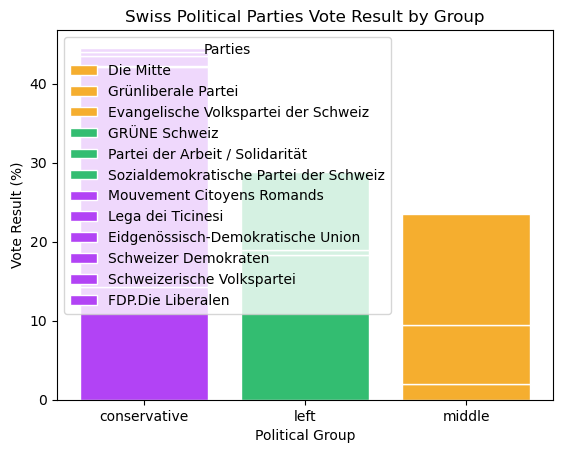

In [3]:
#Version one - abandoned
groups = df.groupby('group')

fig, ax = plt.subplots()

# Stacking bars within each group
for group_name, group_data in groups:
    bottom_height = 0
    for _, row in group_data.iterrows():
        ax.bar(group_name, row['vote_result'], bottom=bottom_height, color=party_information.COLOR_DICT[group_name], edgecolor='white', label=row['name'])
        bottom_height += row['vote_result']

# Adding labels and title
ax.set_xlabel('Political Group')
ax.set_ylabel('Vote Result (%)')
ax.set_title('Swiss Political Parties Vote Result by Group')

# Adding legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Parties', loc='upper left')

plt.show()

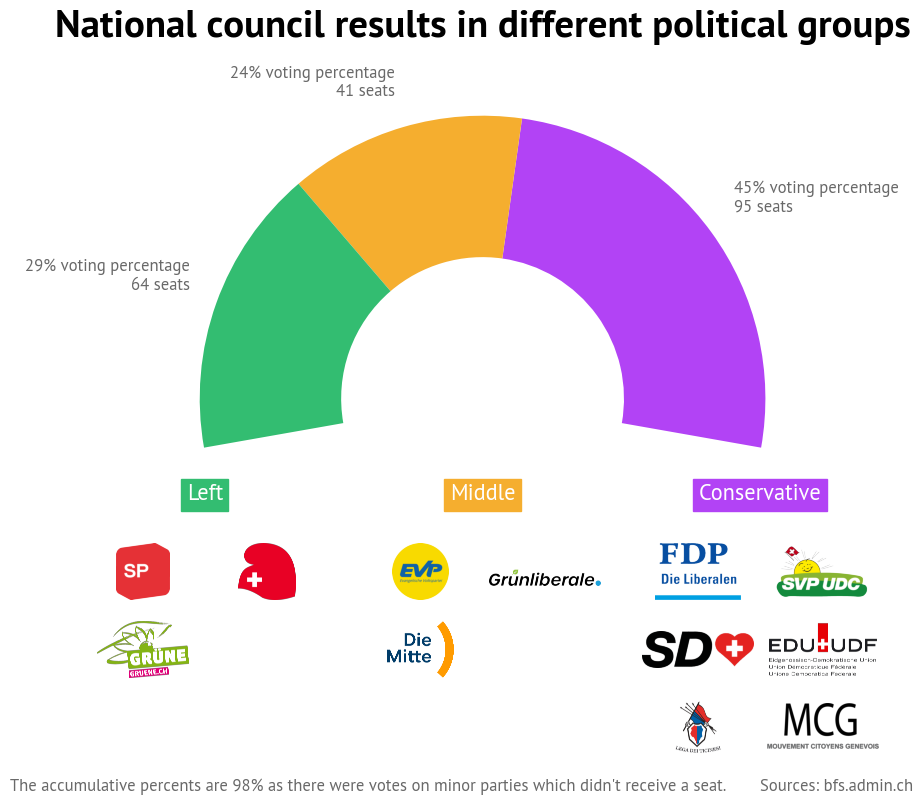

In [19]:
grouped_data = df.groupby('group')['vote_result'].sum()

total_votes = grouped_data.sum()
grouped_data[''] = total_votes / 1.25  # Make the empty half equal to the sum of the other half
grouped_data = grouped_data.reindex(["conservative", "middle", "left", ''])
labels = ['45% voting percentage\n95 seats', '24% voting percentage\n41 seats', '29% voting percentage\n64 seats', '']

# Creating the half-donut chart
fig, axes = plt.subplot_mosaic("DDD;ABC", height_ratios=[1,1], figsize=(10, 10))
pie_ax = axes['D']
pie_ax.set_title('National council results in different political groups', fontdict=font_management.TITLE_FONT, transform=pie_ax.transAxes)
wedges, texts = pie_ax.pie(grouped_data, labels=labels, textprops=font_management.ANNOTATION_FONT, colors=[party_information.COLOR_DICT[key] for key in grouped_data.index],
                       wedgeprops=dict(width=0.5), startangle=-10)
pie_ax.set_ylim(0.5, 1.25)
# Adjusting the start angle so 'left' starts on the left
logos = {
    'FDP.Die Liberalen': 'party_logos/fdp.png',
    'Sozialdemokratische Partei der Schweiz': 'party_logos/sp.gif',
    'Schweizerische Volkspartei': 'party_logos/svp.gif',
    'GRÜNE Schweiz': 'party_logos/gruene.png',
    'Grünliberale Partei': 'party_logos/glp.png',
    'Evangelische Volkspartei der Schweiz': 'party_logos/evp.png',
    'Die Mitte': 'party_logos/Mitte.png',
    'Mouvement Citoyens Romands': 'party_logos/mcg.png',
    'Lega dei Ticinesi': 'party_logos/lega.jpeg',
    'Partei der Arbeit / Solidarität': 'party_logos/pda.png',
    'Schweizer Demokraten': 'party_logos/sd.png',
    'Eidgenössisch-Demokratische Union': 'party_logos/edu.png',
}
party_to_group = df.set_index('name')['group'].to_dict()
party_axes = [axes['A'], axes['B'], axes['C']]
# Define fixed size for all logos based on a 2x3 grid (the most dense grid we have)
# We assume the most logos we can have in a row or column is 3
max_logos_per_row = 2
max_logos_per_col = 3
image_padding = 0.05  # Padding around the image
subplot_padding = 0.3  # Padding between subplots

# Calculate the size for each logo
logo_width = (1 - image_padding * (max_logos_per_row + 1)) / max_logos_per_row
logo_height = (1 - image_padding * (max_logos_per_col + 1)) / max_logos_per_col

# Function to calculate the grid layout based on the number of logos
def calculate_grid(n_l):
    if n_l <= 4:
        return 2, 2  # 2x2 grid for up to 4 logos
    else:
        return 3, 2  # 2x3 grid for more than 4 logos

# Iterate through each group and subplot
for ax, (group, color) in zip(party_axes, party_information.COLOR_DICT.items()):
    ax.set_title(group.capitalize(), fontdict=font_management.DESCRIPTION_FONT,color='white', backgroundcolor=color, pad=20)
    ax.axis('off')  # Turn off the axis

    # Get logos for the current group
    group_logos = [(party, logos[party]) for party, party_group in party_to_group.items() if party_group == group]

    # Calculate the grid layout
    n_logos = len(group_logos)
    n_rows, n_cols = calculate_grid(n_logos)

    # Place logos in the subplot
    for i, (party, logo_path) in enumerate(group_logos):
        # Calculate the row and column position
        row = i // n_cols
        col = i % n_cols

        # Calculate position for this logo
        left = image_padding + col * (logo_width + image_padding)
        bottom = 1 - (row + 1) * (logo_height + image_padding) - row * image_padding

        # Create an inset axis for the logo with fixed size
        logo_ax = ax.inset_axes([left, bottom, logo_width, logo_height])
        img = plt.imread(logo_path)
        logo_ax.imshow(img)
        logo_ax.axis('off')  # Turn off the axis for the logo
plt.tight_layout()
fig.text(x=0.8, y=0, s="Sources: bfs.admin.ch", fontdict=font_management.ANNOTATION_FONT)
fig.text(x=0.05, y=0, s="The accumulative percents are 98% as there were votes on minor parties which didn't receive a seat.", fontdict=font_management.ANNOTATION_FONT)
plt.subplots_adjust(hspace=1.3, top=0.75, bottom=0.05)
plt.show()

In [5]:
grouped_data

group
conservative    44.558744
middle          23.560455
left            28.774531
                77.514985
Name: vote_result, dtype: object